In [171]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from IPython.display import clear_output
from operator import add

%matplotlib inline

In [25]:
df1 = pd.read_csv('takehome_users.csv')
df1['creation_time'] = pd.to_datetime(df1['creation_time'])
df2 = pd.read_csv('takehome_user_engagement.csv')
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df1['day_of_week'] = df1['creation_time'].dt.dayofweek.apply(lambda x: days[x])
df2['day_of_week'] = df2['time_stamp'].dt.dayofweek.apply(lambda x: days[x])

In [26]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs


To detect the 'adopted' users, we can group data in the usage summary table by user_id, an detect those users that have more than 3 visits. This are the potentially adopted users

In [5]:
df2_min_time = df2.groupby('user_id').min()
df2_max_time = df2.groupby('user_id').max()
df2_count = df2.groupby('user_id').count()

In [6]:
df2_count.head()

,time_stamp,visited,day_of_week
user_id,,,
1,1,1,1
2,14,14,14
3,1,1,1
4,1,1,1
5,1,1,1


In [7]:
potential_adopted = df2_count[df2_count.visited > 1].index.values.tolist()
potential_adopted[:7]

[2, 10, 19, 20, 25, 33, 42]

To define the 'adopted' or 'not adopted' of the potentially adopted users, we can see if there is at least one 7-day period with at least three visits. This can be teste with the function defined below, given one user ID



In [60]:
def status(ID):
    K = df2[df2.user_id == ID].sort_values('time_stamp')
    
    status = 'not adopted'
    
    if K.shape[0] > 7:
        for i in range(K.shape[0]-7):
            s = np.sum(K.visited.values[i:(i+7)])
            if s > 3:
                status = 'adopted'
                break
    elif K.shape[0] == 7:
        s = np.sum(K.visited.values)
        if s > 3:
            status = 'adopted'
    
    return status

In [157]:
df1['status'] = df1['object_id'].apply(lambda x: status(x))
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week,status
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues,not adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,adopted
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues,not adopted
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues,not adopted
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs,not adopted


In [158]:
df3 = df1.copy()
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week,status
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues,not adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,adopted
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues,not adopted
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues,not adopted
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs,not adopted


Another alternative is to take some of the existing feautures (columns), to create new features.
First, we the year and month of the  date of account creation.

In [159]:
dates = pd.DatetimeIndex(np.array(df3.creation_time.values, dtype = 'datetime64'))

m = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
     7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df3['Year'] = dates.year
df3['Month'] = pd.Series(dates.month).apply(lambda x: m[x])
del df3['creation_time']
df3.head()


,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week,status,Year,Month
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues,not adopted,2014,Apr
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,adopted,2013,Nov
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues,not adopted,2013,Mar
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues,not adopted,2013,May
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs,not adopted,2013,Jan


Using the name of the client, and the python package 'gender-guesser', we can extract the genter of each client.

In [160]:
import gender_guesser.detector as gender
g = gender.Detector()
df3['gender'] = df3['name'].apply(lambda x: g.get_gender(x.split(' ')[-1]))
df3 = df3[df3['gender'] != 'unknown']
df3.head()

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week,status,Year,Month,gender
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues,not adopted,2014,Apr,male
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,adopted,2013,Nov,male
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues,not adopted,2013,Mar,male
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues,not adopted,2013,May,male
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs,not adopted,2013,Jan,female


We excluded 860 rows for which the gender was undetermined ('unknown')

From the email column we can extract the email's company name.

In [161]:
df3['email'] = df3['email'].apply(lambda x: x.split('@')[-1])
df3.head()

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day_of_week,status,Year,Month,gender
0,1,Clausen August,yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tues,not adopted,2014,Apr,male
1,2,Poole Matthew,gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,adopted,2013,Nov,male
2,3,Bottrill Mitchell,gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tues,not adopted,2013,Mar,male
3,4,Clausen Nicklas,yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tues,not adopted,2013,May,male
4,5,Raw Grace,yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thurs,not adopted,2013,Jan,female


The 'last_session_creation_time' and columns 'invited_by_user_id' will be deleted. 

'last_session_creation_time' --> Seems irrelevant
'invited_by_user_id' --> Is sparse

The name column is also deleted, as this information if captured by the gender column.

Another column deleted is 'org_id'. Upon inspection, it seems that  it doesn't have the same range of values between  'adopted' and 'not adopted' users.

In [162]:
del df3['last_session_creation_time']
del df3['invited_by_user_id']
del df3['name']
df3.head()

,object_id,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,day_of_week,status,Year,Month,gender
0,1,yahoo.com,GUEST_INVITE,1,0,11,Tues,not adopted,2014,Apr,male
1,2,gustr.com,ORG_INVITE,0,0,1,Fri,adopted,2013,Nov,male
2,3,gustr.com,ORG_INVITE,0,0,94,Tues,not adopted,2013,Mar,male
3,4,yahoo.com,GUEST_INVITE,0,0,1,Tues,not adopted,2013,May,male
4,5,yahoo.com,GUEST_INVITE,0,0,193,Thurs,not adopted,2013,Jan,female


The resulting dataframe has only  categorical features.
We can use the function defined belom, the proportion of each category for adopted and not-adopted users

In [288]:
columns = ['email','creation_source','opted_in_to_mailing_list',
           'enabled_for_marketing_drip','day_of_week',
           'Year', 'Month', 'gender']

df_n = df3[df3['status'] == 'not adopted']
df_a = df3[df3['status'] == 'adopted']

def plot_group(col, subset = False):
    a = df_n[col].value_counts()
    b = df_a[col].value_counts()
    
    values = a.index.values
    
    if subset:
        a1 = a[a > 2]
        b1 = b[b > 2]
        a1['unknown'] = np.sum(a[a <= 2])
        b1['unknown'] = np.sum(b[b <= 2])
        values = a1.index.values
        a = a1
        b = b1
        
    aa1 = []
    bb1 = []
    
    for value in values:
        aa1.append(a[value])
        bb1.append(b[value])
    
    total = map(add, aa1, bb1)
    p_n = np.asarray(aa1).astype('float')/np.asarray(total).astype('float')
    p_a = np.asarray(bb1).astype('float')/np.asarray(total).astype('float')
    
    ind = np.arange(len(values))
    width = 0.5       
    
    fig, ax = plt.subplots(figsize = (15, 7.5))

    p1 = plt.bar(ind, p_n, width)
    p2 = plt.bar(ind, p_a, width, bottom = p_n)
    plt.ylabel('proportions')
    plt.xticks(ind, values)
    plt.title(col)
    plt.legend((p1[0], p2[0]), ('Not Adopted', 'Adopted'), bbox_to_anchor=(1, 0.5))
    
    plt.show()

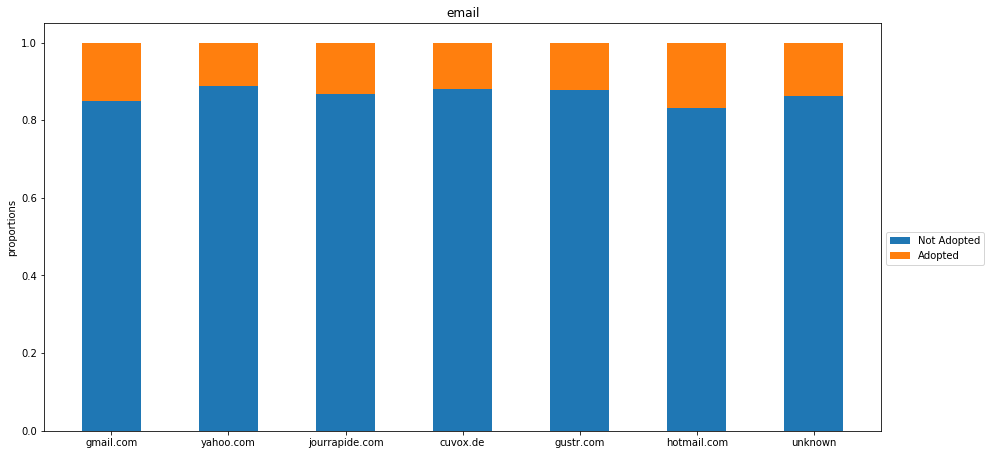

In [289]:
plot_group(columns[0], True)

There were several 'unknown' email companies, with a count of 2 or less in either adopted or not-adopted  users. Those were all grouped into the "unknown' category shown in the graph.

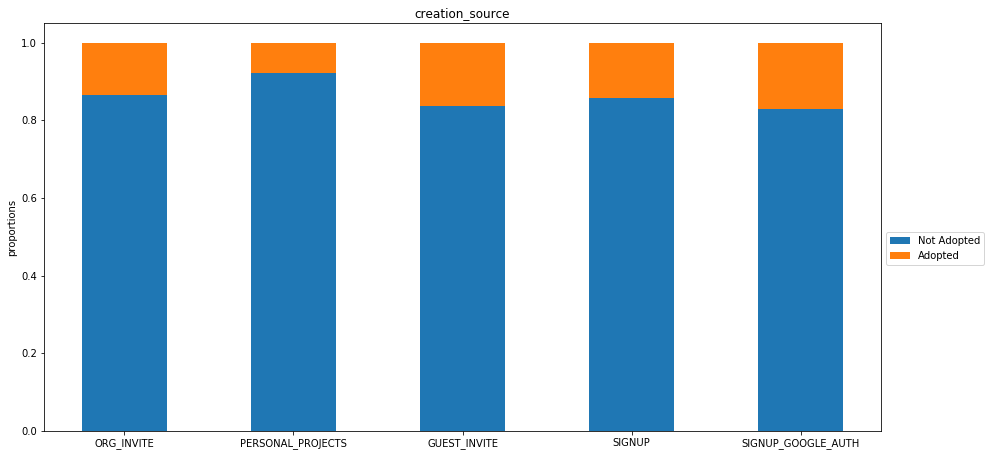

In [290]:
plot_group(columns[1])

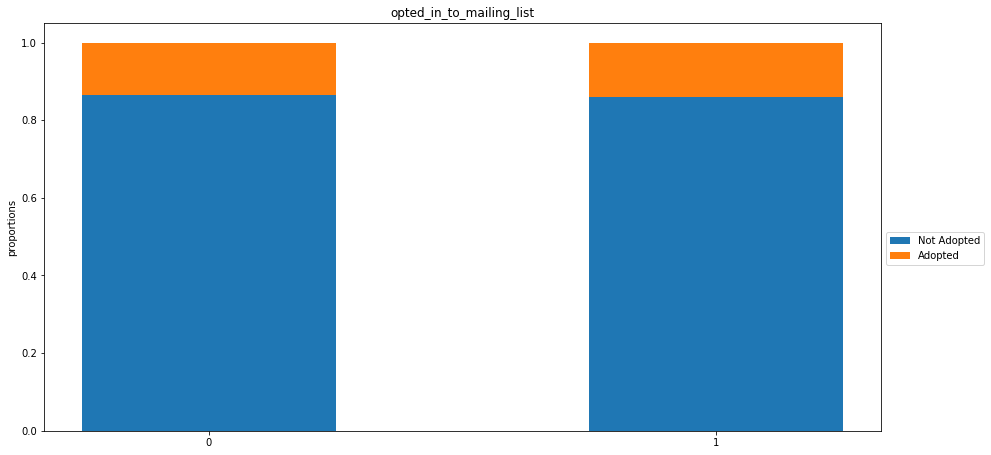

In [291]:
plot_group(columns[2])

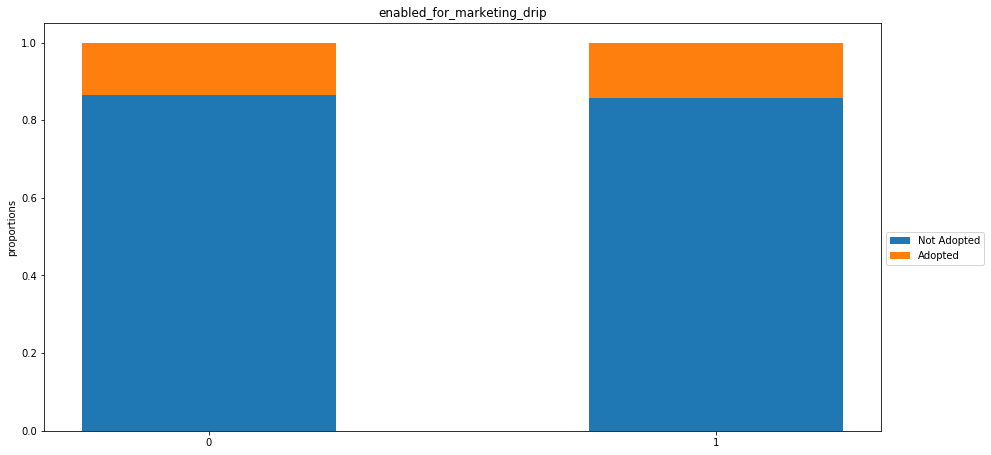

In [292]:
plot_group(columns[3])

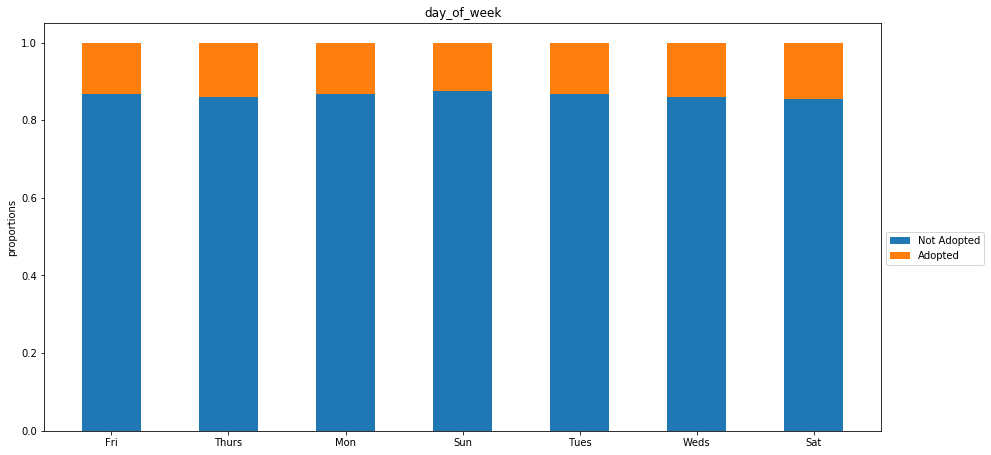

In [293]:
plot_group(columns[4])

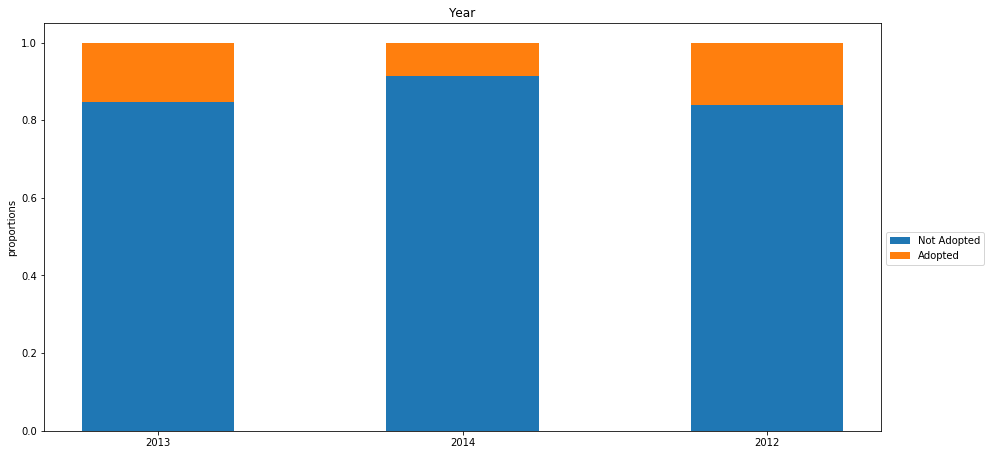

In [294]:
plot_group(columns[5])

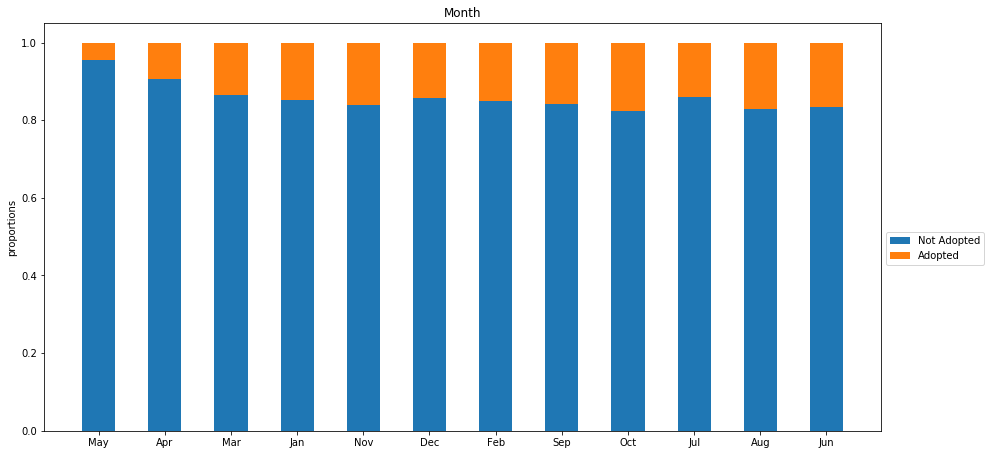

In [295]:
plot_group(columns[6])

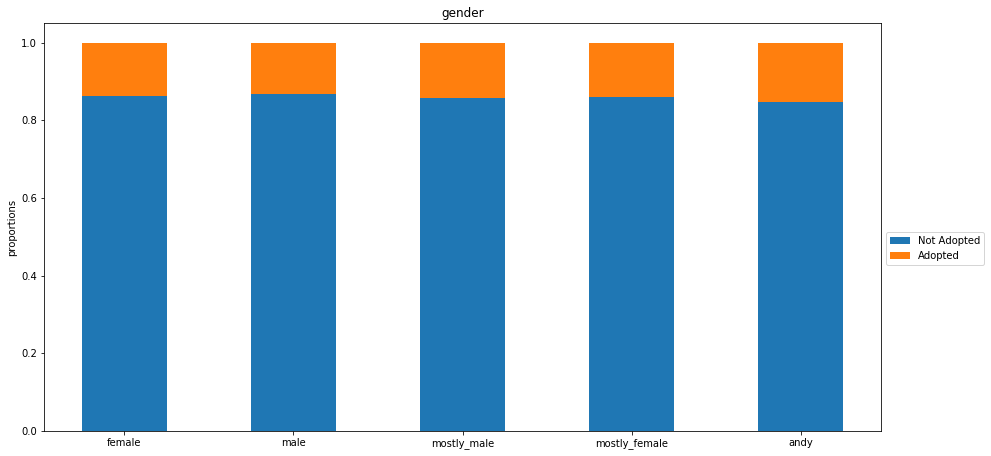

In [296]:
plot_group(columns[7])

# Conclusion
Judging by the differences seen in the plots above, it can be estimated that 'email company", 'creation_souorce', 'Year of account creation' and 'Month of account creation. Thus a future predictive model could focus on these features to predict the 'adopted'